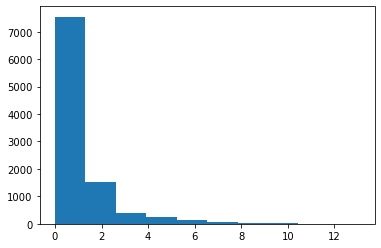

In [3]:
import random
from math import sqrt

def distance_chi_square_from_toss_coin():
    eagles = 0
    tails = 0
    # подбрасываем монету 60 раз
    for i in range(60):
        if random.randint(0,1):
            eagles += 1
        else:
            tails += 1
    # расчитываем расстояние хи-квадрат Пирсона: 
    # ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
    return (
        (eagles-30)**2/30 + (tails-30)**2/30
    )
list_of_chi_square = []
for i in range(10000):
    list_of_chi_square.append(distance_chi_square_from_toss_coin())
import matplotlib.pyplot as plt

plt.hist(list_of_chi_square);

In [4]:
# посмотрим еще раз на значение, которое мы получали в нашем 
# конкретном наблюдении с выпаданием орла и решки (когда получили 40 орлов!):
exp_eagles = 40
exp_tails = 20
# расчитываем расстояние хи-квадрат Пирсона: 
# ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
res_of_exp_chi_2 = (exp_eagles-30)**2/30 + (exp_tails-30)**2/30
print(res_of_exp_chi_2)

6.666666666666667


(array([727., 109., 105.,  27.,  15.,  11.,   0.,   4.,   0.,   2.]),
 array([ 0.        ,  1.12666667,  2.25333333,  3.38      ,  4.50666667,
         5.63333333,  6.76      ,  7.88666667,  9.01333333, 10.14      ,
        11.26666667]),
 <BarContainer object of 10 artists>)

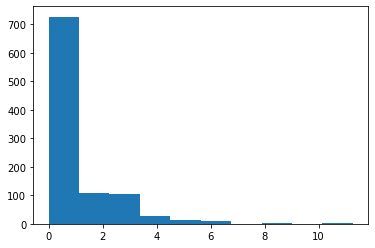

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

n = 60
p = 0.5
N = 10**3

o1 = np.random.binomial(n, p, N)
o2 = np.ndarray((N))
o2.fill(60)
o2 = o2 - o1

e1 = np.ndarray((N))
e1.fill(int(n / 2))
e2 = e1.copy()

simulated_chi_dist = (o1 - e1)**2 / e1 + (o2 - e2)**2 / e2

plt.hist(simulated_chi_dist)

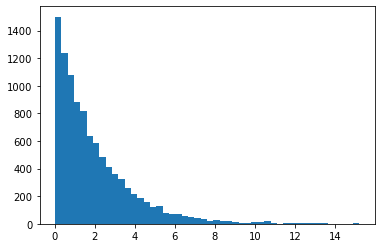

In [11]:


plt.hist(np.array([random.normalvariate(0, 1)**2 + random.normalvariate(0, 1)**2  for _ in range(10000)]), bins=48)
plt.show()

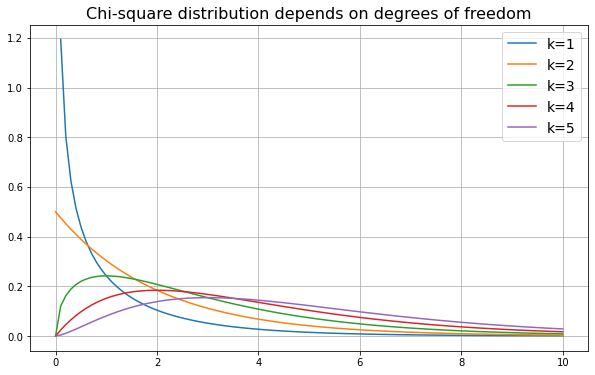

In [18]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

df_s = 5

x = np.linspace(0, 10, 100)

for i in range(df_s):
    df = i + 1
    plt.plot(x, chi2.pdf(x, df), label=f'k={df}')
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.title('Сhi-square distribution depends on degrees of freedom', fontsize=16)
plt.grid()
plt.show()

In [3]:
from scipy.stats import chi2_contingency
obs = ([20, 11, 7], [15, 12, 9])
chi2_contingency(obs)

(0.9544070774762996,
 0.6205162173513055,
 2,
 array([[17.97297297, 11.81081081,  8.21621622],
        [17.02702703, 11.18918919,  7.78378378]]))

In [4]:
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import scipy


table = [[20,15],[11,12],[7,9]] #загружаем исходную табличку


chi2, prob, df, expected = scipy.stats.chi2_contingency(table) #рассчитываем параметры Хи-квадрат


#вывод:


output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"


print(output.format( chi2, df, prob))


print(expected)

test Statistics: 0.9544070774762996
degrees of freedom: 2
p-value: 0.6205162173513055

[[17.97297297 17.02702703]
 [11.81081081 11.18918919]
 [ 8.21621622  7.78378378]]


In [6]:
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt

tuples = list(product(['Placebo', 'Aspirine'], ['Yes', 'No']))
index = pd.MultiIndex.from_tuples(tuples)
data = pd.Series([18,7,6,13], index=index)
mosaic(data, title='hierarchical index series')
plt.show()

NameError: name 'mosaic' is not defined

Thrombosis  No  Yes
Group              
Aspirin     13    6
Placebo      7   18


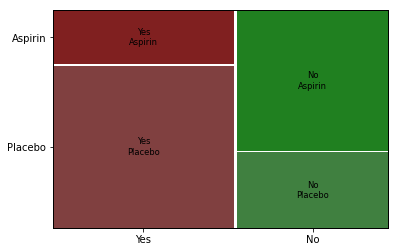

In [7]:
import pandas as pd
patients = pd.DataFrame({"Thrombosis": ["Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No"], "Group": ["Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin"]})
#посмотрим на сводную таблицу пересечения признаков
print(pd.pivot_table(patients, index=["Group"], columns=["Thrombosis"], aggfunc=lambda x: len(x)))
#строим график
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
mosaic(patients, ["Thrombosis","Group"], gap=0.01)
plt.show()

(<Figure size 432x288 with 3 Axes>,
 {('Aspirin', 'No'): (0.0, 0.0, 0.4296698326549073, 0.6819374016436439),
  ('Aspirin', 'Yes'): (0.0,
   0.6852596607798566,
   0.4296698326549073,
   0.31474033922014333),
  ('Placebo', 'No'): (0.4346449570330168,
   0.0,
   0.5653550429669832,
   0.27906976744186046),
  ('Placebo', 'Yes'): (0.4346449570330168,
   0.2823920265780731,
   0.5653550429669832,
   0.7176079734219268)})

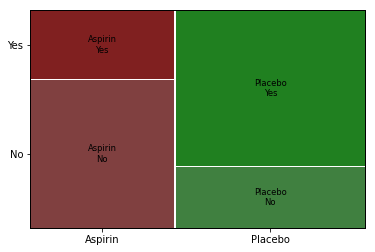

In [8]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
patients = pd.DataFrame({"Thrombosis": ["Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No"], "Group": ["Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin"]})
#посмотрим на сводную таблицу пересечения признаков
pivot = pd.pivot_table(patients, index=["Group"], columns=["Thrombosis"], aggfunc=lambda x: len(x))
#обращаем внимание на stack() 
mosaic(pivot.stack())

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

'''
data_stepik3 = pd.read_csv('states.csv')
'''

axes = pd.plotting.scatter_matrix(data_stepik3, figsize=(10,10), diagonal='kde', grid=True)
data_corr = data_stepik3.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %data_corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

NameError: name 'data_stepik3' is not defined

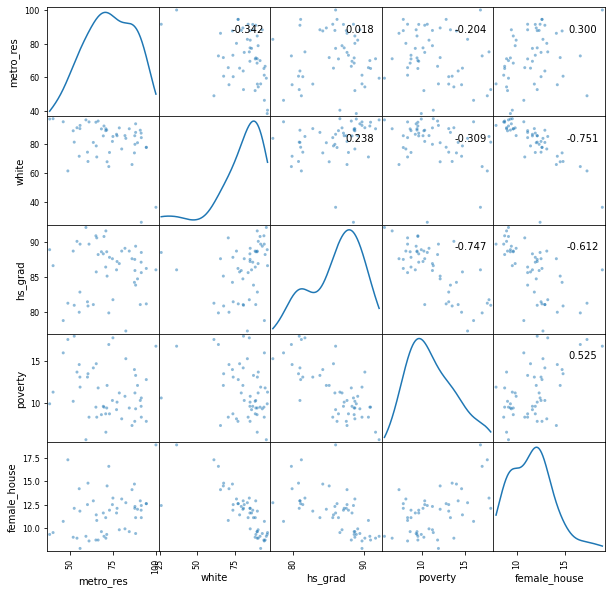

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data_stepik3 = pd.read_csv('states.csv')


axes = pd.plotting.scatter_matrix(data_stepik3, figsize=(10,10), diagonal='kde', grid=True)
data_corr = data_stepik3.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %data_corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [1]:
from scipy import stats 
print(f'На промежутке [-2σ ; 0,8σ] расположено {(stats.norm.cdf(0.8) - stats.norm.cdf(-2)):.2%} значений')

На промежутке [-2σ ; 0,8σ] расположено 76.54% значений


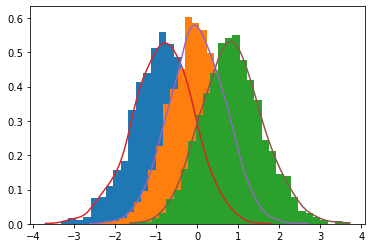

In [4]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt



def get_gaussian_density(dataset):
    ''' Гауссово распределение, полученное на основе выборки

        :param dataset: массив значений
    '''

    density = ss.gaussian_kde(dataset)
    density.covariance_factor = lambda : 0.25
    density._compute_covariance()

    min_x, max_x = np.percentile(dataset, [0, 100])

    return np.linspace(min_x, max_x, 200), density




mu, sigma = 0, 1 # Среднее и стандартное отклонение
rnd = np.random.normal(mu, sigma, 10000)  # Выборка случайно распределенной величины


# Случайно выбираем по 3 пробы, сортируем их
random_samples = (
  sorted(np.random.choice(rnd, 3))
  for i in range(10000)
)

# Zip функция - без комментариев (функциональное программирование, есть на Вики)
# на выходе получаем массивы минимальных, средних и максимальных значений
rnd1, rnd2, rnd3 = zip(*random_samples)


# Гистограмма частот распределения случайной величины (опционально)
counts_1, x_range_1, ignored = plt.hist(rnd1, 30, density=True, histtype='barstacked')
counts_2, x_range_2, ignored = plt.hist(rnd2, 30, density=True, histtype='barstacked')
counts_3, x_range_3, ignored = plt.hist(rnd3, 30, density=True, histtype='barstacked')


# Гауссова оценка плотности ядра (приближение к гладкой функции)
x1, linear_1 = get_gaussian_density(rnd1)
x2, linear_2 = get_gaussian_density(rnd2)
x3, linear_3 = get_gaussian_density(rnd3)


plt.plot(x1, linear_1(x1))
plt.plot(x2, linear_2(x2))
plt.plot(x3, linear_3(x3))


plt.show()

In [1]:
from pandas import DataFrame
from sklearn.cluster import KMeans

Data = {'x': [-3,1,2,3,5,6,7],
        'y': [3,4,6,8,2,11,1]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(1)
kmeans.fit(df)
print(kmeans.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


146.0


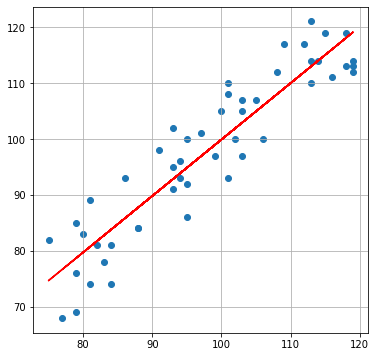

NameError: name 'pca' is not defined

In [4]:
import numpy as np

import matplotlib.pyplot as plt

# генерируем линейную зависимость оценок
R = np.random.randint(75,120,50)
stat = [elem + np.random.randint(-10,10) for elem in R]
X = np.column_stack((R, stat))

x = X[:,0]
y = X[:,1]

# рисуем диаграмму рассеивания 
plt.figure(figsize=(6, 6))
plt.scatter(x, y)

# добавляем регрессионную прямую
b1, b0 = np.polyfit(x, y, 1) #  b0 - intercept, b1 - slope
plt.plot(x, b0 + b1*x, color='red')
plt.grid()
plt.show()

